#  import necessary libraries

In [6]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#  import the original dataset


In [184]:
# import the original dataset

df=pd.read_csv("salary.csv")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [125]:
df.isnull()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5887,False,False,False,False,False,False,False,False,False,False,False
5888,False,False,False,False,False,False,False,False,False,False,False
5889,False,False,False,False,False,False,False,False,False,False,False
5890,False,False,False,False,False,False,False,False,False,False,False


In [126]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue'],
      dtype='object')

In [127]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [128]:
df.tail()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)
5891,Data Scientist/ Full Stack Developer,$65 - $72 Per Hour,3.7,Epitec\n3.7,"Wisconsin, WI",1001 to 5000 Employees,1978,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD)


In [129]:
df["Industry"].value_counts()

-1                                 863
IT Services                        574
Biotech & Pharmaceuticals          449
Staffing & Outsourcing             426
Computer Hardware & Software       358
                                  ... 
Self-Storage Services                1
Sporting Goods Stores                1
Museums, Zoos & Amusement Parks      1
Metals Brokers                       1
Charter Air Travel                   1
Name: Industry, Length: 118, dtype: int64

In [185]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            1504
$10+ billion (USD)                  1002
-1                                   562
$100 to $500 million (USD)           475
$2 to $5 billion (USD)               358
$1 to $2 billion (USD)               295
$50 to $100 million (USD)            292
$5 to $10 billion (USD)              285
$10 to $25 million (USD)             262
$25 to $50 million (USD)             214
$1 to $5 million (USD)               207
$500 million to $1 billion (USD)     162
Less than $1 million (USD)           139
$5 to $10 million (USD)              135
Name: Revenue, dtype: int64

In [130]:

# removing comany name faeture as it is not impactful in prediction of salary
import pandas as pd

df=pd.read_csv("salary.csv")

columns_to_remove = ['Company Name']
df = df.drop(columns=columns_to_remove)

df.to_csv('modified_salary.csv', index=False)

print("Columns removed and dataset saved successfully.")



Columns removed and dataset saved successfully.


In [133]:
# removing missing values with value -1

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("modified_salary.csv")


# Replace '-1' with NaN and drop rows with missing values
df.replace('-1', np.nan, inplace=True)
df.dropna(inplace=True)

df.to_csv('modified_salary.csv', index=False)

print(f"Cleaned dataset shape: {df.shape}")
print("Columns removed and dataset saved successfully.")



Cleaned dataset shape: (4282, 10)
Columns removed and dataset saved successfully.


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          4282 non-null   object 
 1   Salary Estimate    4282 non-null   object 
 2   Rating             4282 non-null   float64
 3   Location           4282 non-null   object 
 4   Size               4282 non-null   object 
 5   Founded            4282 non-null   int64  
 6   Type of ownership  4282 non-null   object 
 7   Industry           4282 non-null   object 
 8   Sector             4282 non-null   object 
 9   Revenue            4282 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 334.7+ KB


In [137]:
df.head()

,Job Title,Salary Estimate,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Analyst,$111K-$181K (Glassdoor est.),3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
4,Data Scientist,$111K-$181K (Glassdoor est.),2.9,"New York, NY",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable


# Cleaning and Preprocessing


In [148]:

#Convert salary ranges and employee size ranges into numerical midpoints for consistent analysis


import pandas as pd
import numpy as np

df = pd.read_csv("modified_salary.csv")

# Function to clean and convert Salary Estimate
def clean_salary(salary):
    if pd.isnull(salary):
        return np.nan
    salary = salary.replace('$', '').replace('K', '').replace('(Glassdoor est.)', '').strip()
    if '-' in salary:
        salary_range = salary.split('-')
        try:
            return np.mean([float(s) * 1000 for s in salary_range])  # Convert to integers
        except ValueError:
            return np.nan
    return np.nan

# Function to clean and convert Size to numeric values (midpoint)
def clean_size(size):
    if pd.isnull(size):
        return np.nan
    size = size.replace('employees', '').strip()
    if 'to' in size:
        size_range = size.split('to')
        try:
            return np.mean([float(s.strip()) for s in size_range])  # Handle spaces in ranges
        except ValueError:
            return np.nan
    elif '10000+' in size:
        return 10000  # Replace with a fixed large number
    return np.nan



# Function to clean and convert Revenue column
def clean_revenue(revenue):
    if pd.isnull(revenue):
        return np.nan

    # Remove '(USD)', '$', and 'Less than' to have a pure numerical
    revenue = revenue.replace('(USD)', '').replace('$', '').replace('Less than', '').strip()
    
    # Handle ranges with 'to'
    if 'to' in revenue:
        revenue_range = revenue.split('to')
        try:
            min_val = convert_to_numeric(revenue_range[0].strip())
            max_val = convert_to_numeric(revenue_range[1].strip())
            return np.mean([min_val, max_val])
        except ValueError:
            return np.nan
    
    # Handle '$10+ billion'
    if '+' in revenue:
        revenue = revenue.replace('+', '')
    
    # Convert single values like '1 million' or '10 billion'
    return convert_to_numeric(revenue)

# function to convert 'million' and 'billion' to numerical values
def convert_to_numeric(value):
    if 'million' in value:
        return float(value.replace('million', '').strip()) * 1e6
    elif 'billion' in value:
        return float(value.replace('billion', '').strip()) * 1e9
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply transformations for revised values for features
df['Salary Estimate'] = df['Salary Estimate'].apply(clean_salary)
df['Size'] = df['Size'].apply(clean_size)
df['Revenue'] = df['Revenue'].apply(clean_revenue)

# Drop rows with missing Salary , Size and revenue after conversion
df.dropna(subset=['Salary Estimate', 'Size','Revenue'], inplace=True)

df.to_csv('cleaned_modified_salary_data.csv', index=False)

print(df.head())



                          Job Title  Salary Estimate  Rating      Location  \
9   Data Scientist/Machine Learning         146000.0     4.4  New York, NY   
10    Data Scientist, Acorn AI Labs         146000.0     4.3  New York, NY   
14        Data Scientist, Analytics         146000.0     3.6  Brooklyn, NY   
15       Data Scientist/ML Engineer         146000.0     3.3  New York, NY   
16                   Data Scientist         146000.0     3.6  New York, NY   

      Size  Founded  Type of ownership  \
9    125.5     2011  Company - Private   
10  3000.5     1999   Company - Public   
14   750.5     2005   Company - Public   
15  3000.5     1943  Company - Private   
16   750.5     2005   Company - Public   

                                   Industry                  Sector  \
9                                  Internet  Information Technology   
10  Enterprise Software & Network Solutions  Information Technology   
14                      Other Retail Stores                  Reta

In [150]:
df['Revenue'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2646    False
2647    False
2648    False
2649    False
2650    False
Name: Revenue, Length: 2651, dtype: bool

In [154]:

# preprocessing

#to lable encoding and normalization at the same time 


df=pd.read_csv("cleaned_modified_salary_data.csv")

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd


# Numerical to normalize
numerical_cols = ['Rating','Size','Salary Estimate', 'Founded','Revenue']

# Categorical to label encode
categorical_cols = ['Job Title', 'Location',
         'Type of ownership', 'Industry', 'Sector']



# Create transformers for numerical and label encoding
numerical_transformer = MinMaxScaler()

# Define a custom transformer for label encoding
def label_encode(df):
    le = LabelEncoder()
    for col in categorical_cols :
        df[col] = le.fit_transform(df[col])
    return df

# Combine transformers
preprocessor = make_column_transformer(
    (numerical_transformer, numerical_cols),
    (FunctionTransformer(label_encode, validate=False), categorical_cols)
)

# Fit and transform the data using the preprocessor
X_transformed = preprocessor.fit_transform(df)

# Get the feature names after label encoding
transformed_columns = numerical_cols + categorical_cols 

df_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)
df_transformed.to_csv('preprocessed_salary_data.csv', index=False)

In [155]:
df=pd.read_csv("preprocessed_salary_data.csv")


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             2651 non-null   float64
 1   Size               2651 non-null   float64
 2   Salary Estimate    2651 non-null   float64
 3   Founded            2651 non-null   float64
 4   Revenue            2651 non-null   float64
 5   Job Title          2651 non-null   float64
 6   Location           2651 non-null   float64
 7   Type of ownership  2651 non-null   float64
 8   Industry           2651 non-null   float64
 9   Sector             2651 non-null   float64
dtypes: float64(10)
memory usage: 207.2 KB


# Feature Selection 


     Feature Categorized Rate   F-Score        P-Value
0   Location              100  6.982477  2.259392e-142
1    Founded               90  2.702152   5.502087e-31
2    Revenue               70  2.444988   8.183616e-25
3       Size               50  2.353896   1.072366e-22
4     Sector               40  1.990680   9.715150e-15
5   Industry               20  1.677326   9.479846e-09
6  Job Title              NaN  1.336203   1.092771e-03


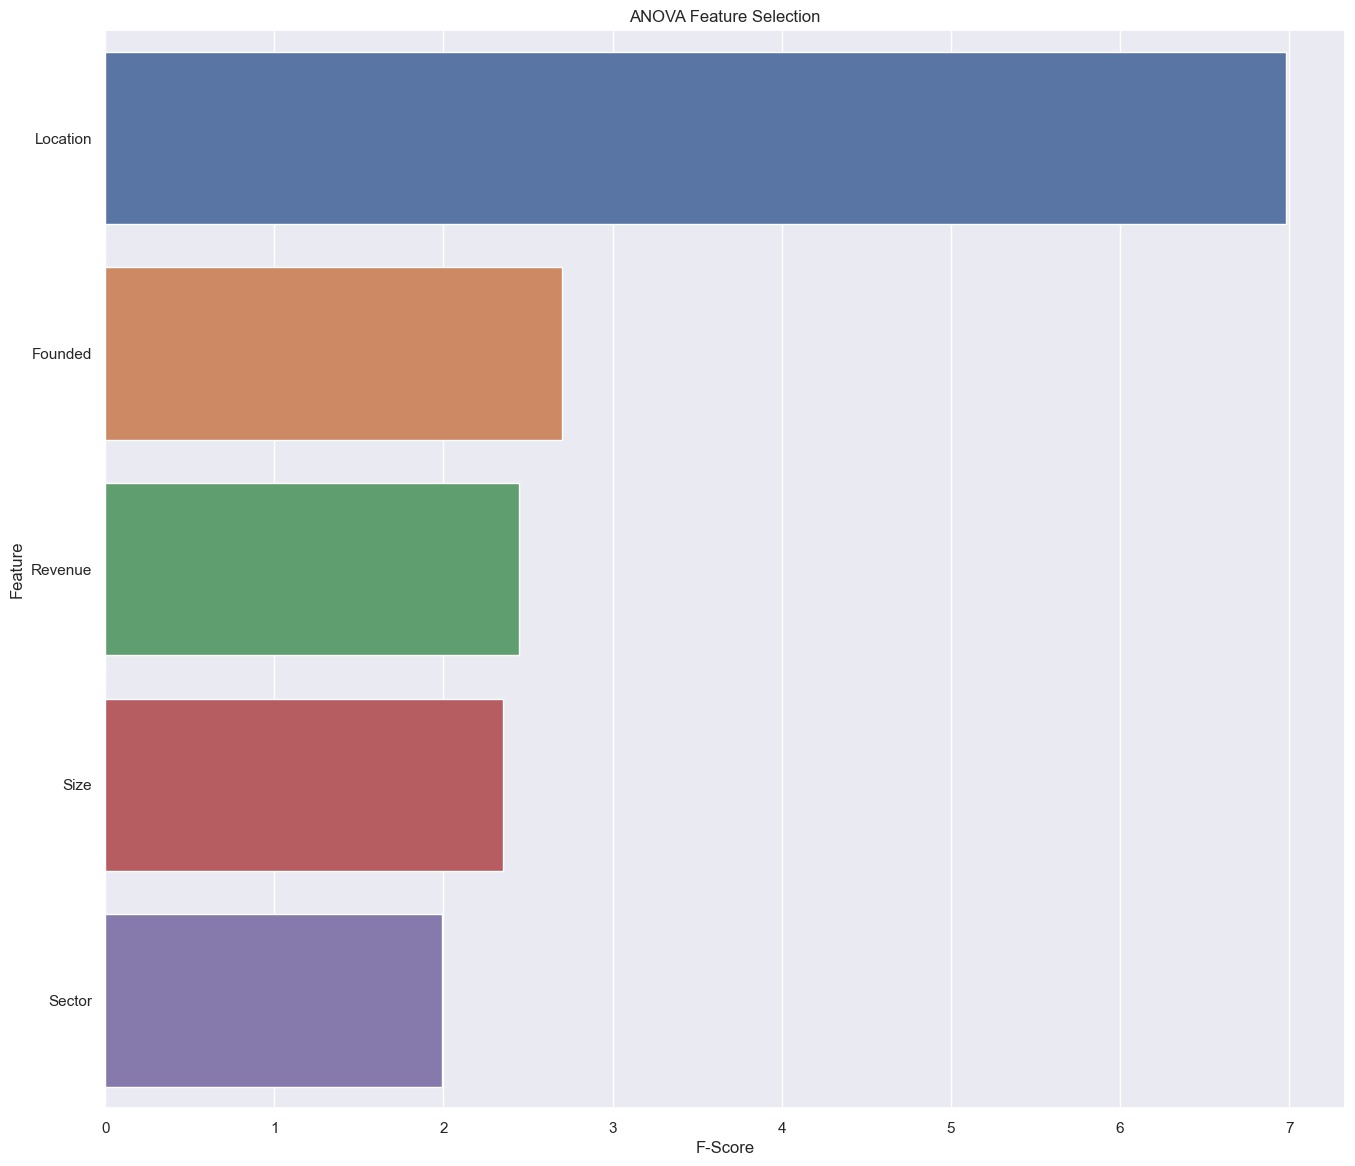

In [157]:

# use anova for getting important features
 
import numpy as np
from sklearn.feature_selection import f_classif
df=pd.read_csv("preprocessed_salary_data.csv")

X = df.drop("Salary Estimate", axis=1)  
y = df["Salary Estimate"]  

# Perform ANOVA analysis
f_scores, p_values = f_classif(X, y)

# Create a DataFrame (dictionary)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Select features based on a significance threshold (e.g., p-value < 0.05)
significant_features = anova_results[anova_results['P-Value'] < 0.05]

# Sort significant features by F-Score in descending order
significant_features = significant_features.sort_values(by='F-Score', ascending=False)


num_bins = 10 
bin_edges = np.percentile(significant_features['F-Score'], np.linspace(0, 100, num_bins + 1))
categorized_features = pd.cut(significant_features['F-Score'], bins=bin_edges, labels=range(10, 101, 10))
significant_features['Categorized Rate'] = categorized_features



# Display and export only the first 15 significant features
table = significant_features[['Feature', 'Categorized Rate', 'F-Score', 'P-Value']].head(7).reset_index(drop=True)
print(table)

# Visualize
plt.figure(figsize=(16, 14))
sns.barplot(x='F-Score', y='Feature', data=significant_features.head(5))
plt.title('ANOVA Feature Selection')
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.show()


table.to_csv('top_7_significant_features.csv', index=False)


# Visualization/ Exploratory Data Analysis(EDA)

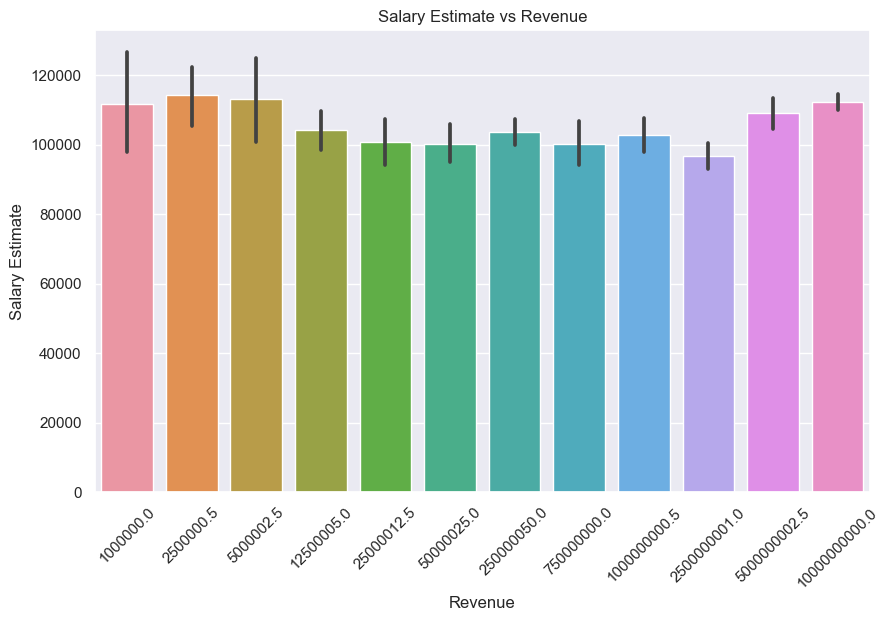

In [186]:
# to get  corrolation between salary and revenue

df=pd.read_csv("cleaned_modified_salary_data.csv")

cols = df.select_dtypes(include=['float64', 'int64'])

import seaborn as sns
import matplotlib.pyplot as plt

numerical_column ='Salary Estimate'
categorical_column ='Revenue'

plt.figure(figsize=(10, 6))
sns.barplot(x=numerical_column, y=numerical_column, data=df)
plt.title(f'{numerical_column} vs {categorical_column}')
plt.xlabel(numerical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation=45)
plt.show()



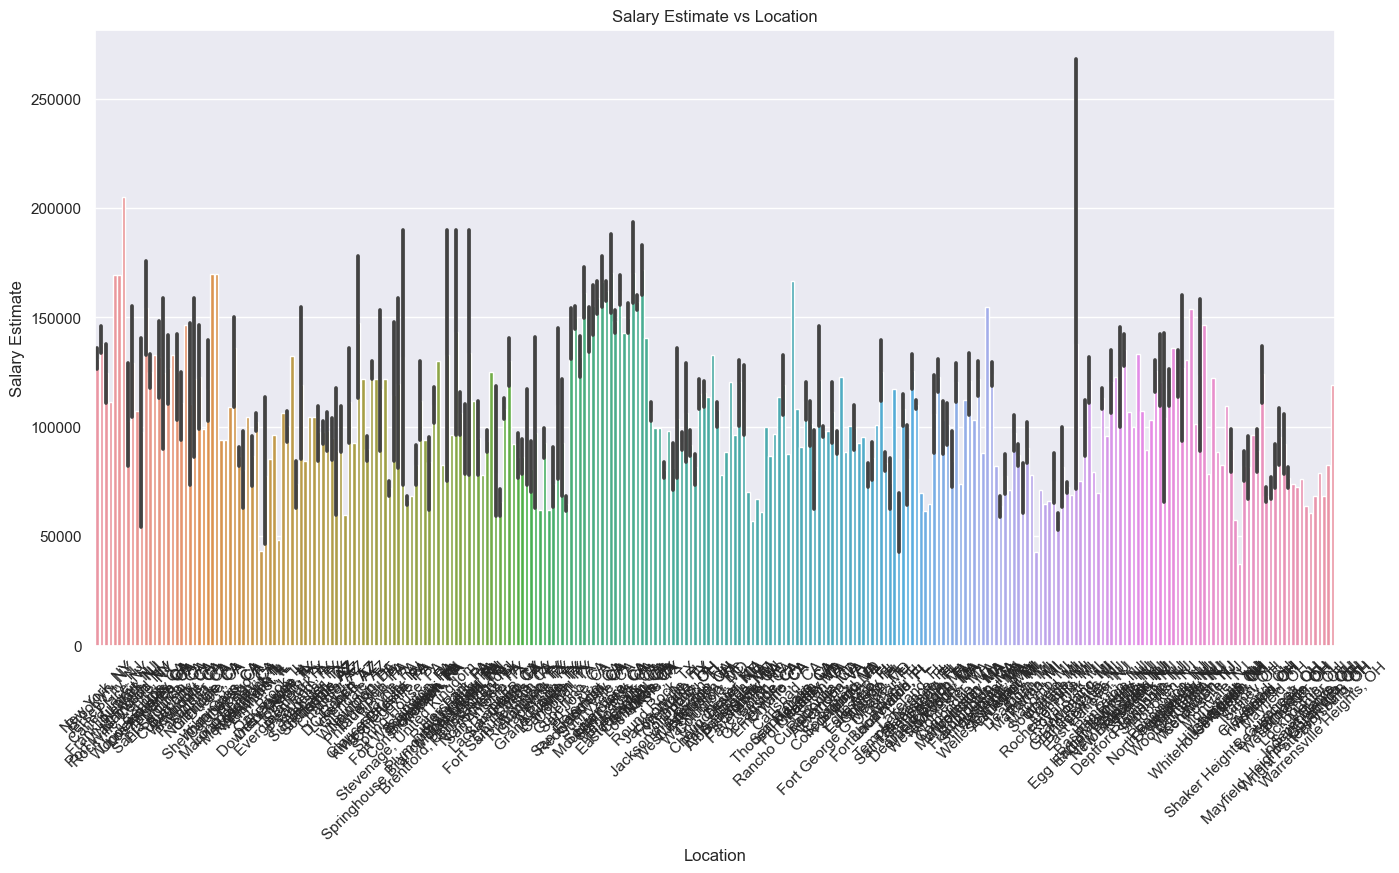

In [188]:
# to get  corrolation between salary and location

df=pd.read_csv("cleaned_modified_salary_data.csv")

cols = df.select_dtypes(include=['float64', 'int64'])

import seaborn as sns
import matplotlib.pyplot as plt

numerical_column ='Salary Estimate'
categorical_column ='Location'

plt.figure(figsize=(16,8))
sns.barplot(x=categorical_column, y=numerical_column, data=df)
plt.title(f'{numerical_column} vs {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation=45)
plt.show()



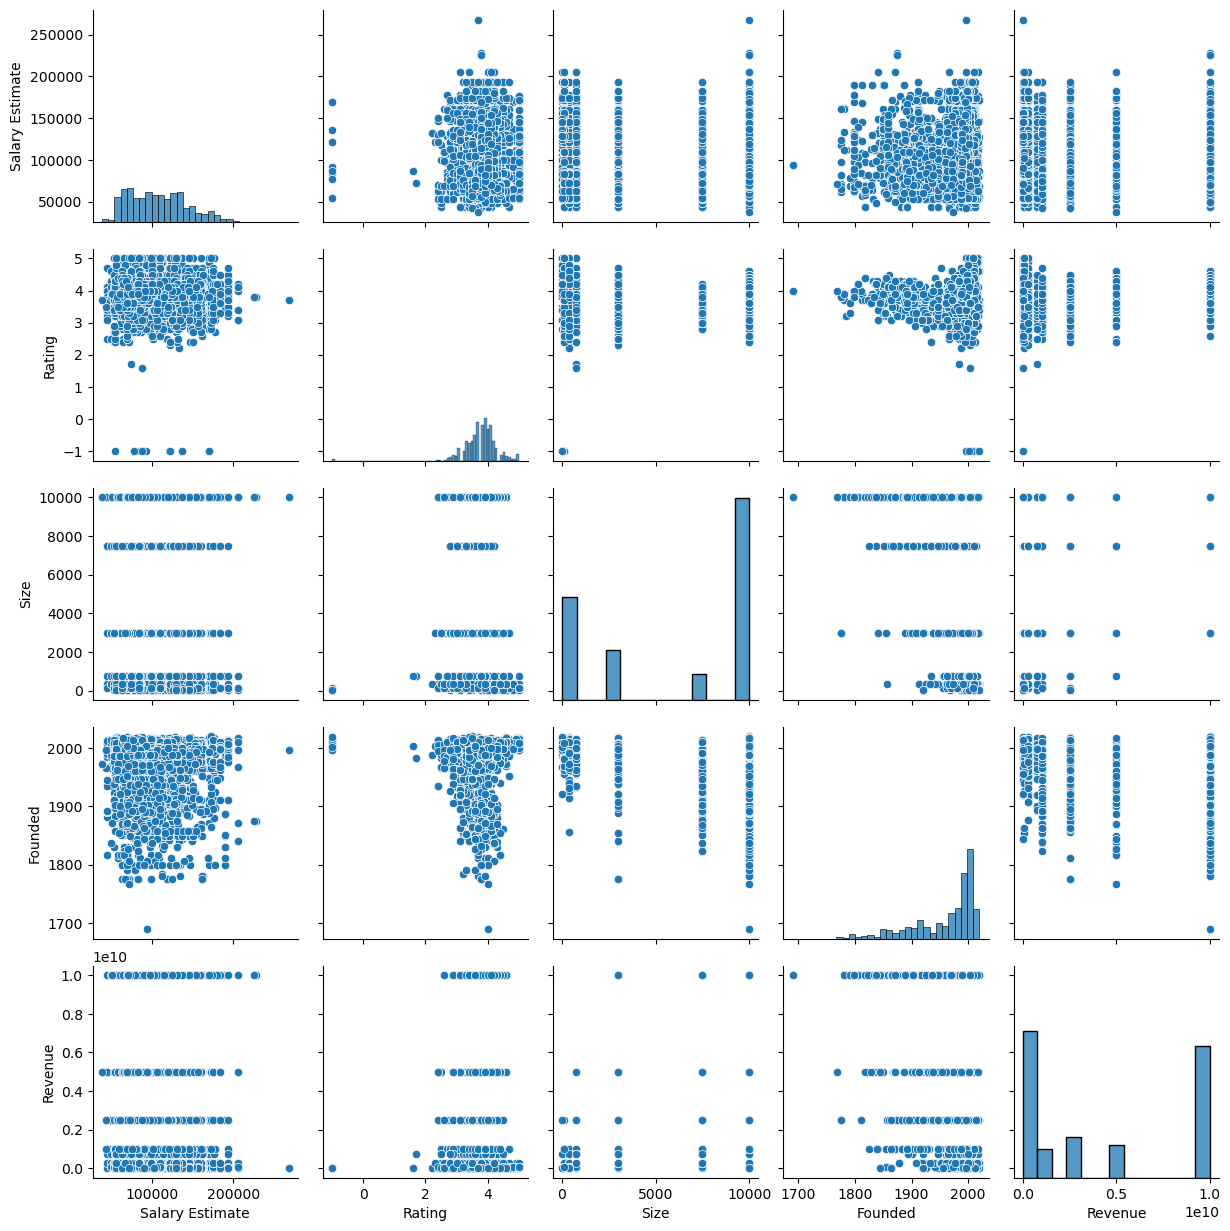

In [5]:

df=pd.read_csv("cleaned_modified_salary_data.csv")

sns.pairplot(df)



In [175]:
df=pd.read_csv("preprocessed_salary_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             2651 non-null   float64
 1   Size               2651 non-null   float64
 2   Salary Estimate    2651 non-null   float64
 3   Founded            2651 non-null   float64
 4   Revenue            2651 non-null   float64
 5   Job Title          2651 non-null   float64
 6   Location           2651 non-null   float64
 7   Type of ownership  2651 non-null   float64
 8   Industry           2651 non-null   float64
 9   Sector             2651 non-null   float64
dtypes: float64(10)
memory usage: 207.2 KB


# Heatmap

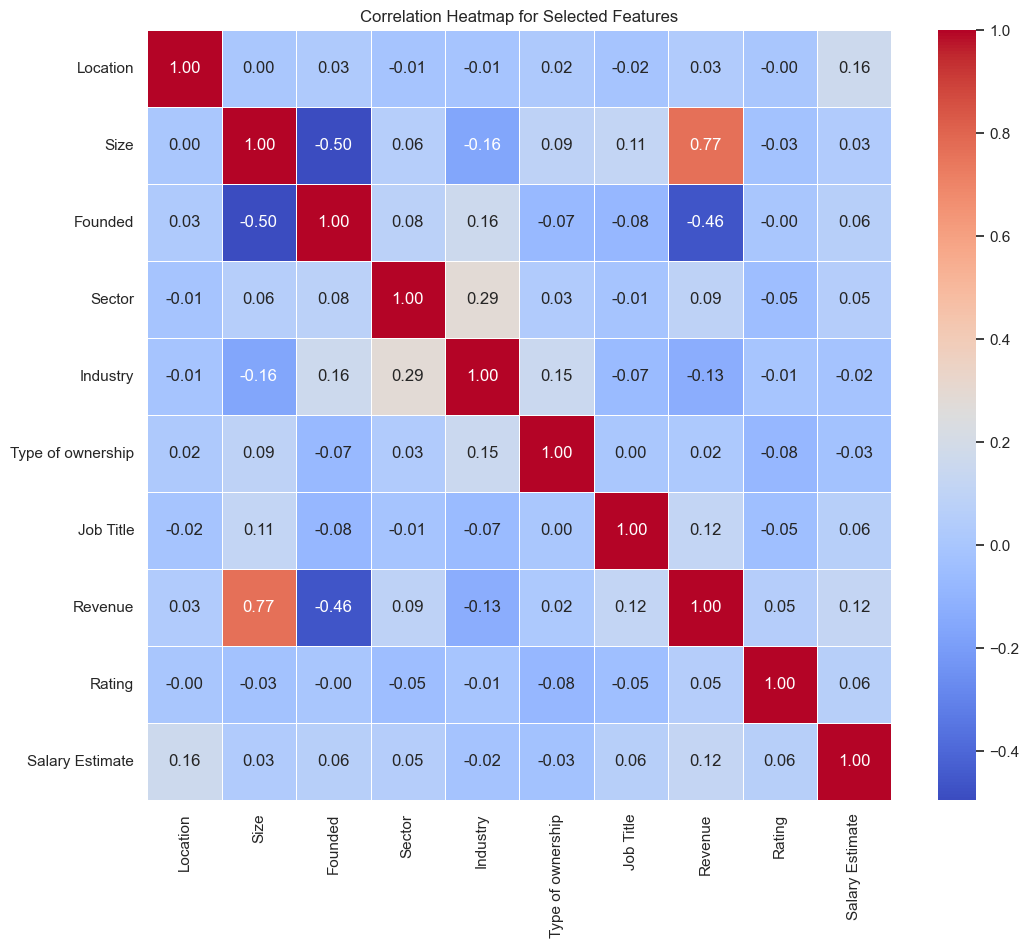

In [176]:

# all features

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


selected_features = df[['Location', 'Size', 'Founded', 'Sector', 'Industry', 'Type of ownership', 'Job Title','Revenue','Rating','Salary Estimate']]


correlation_matrix = selected_features.corr()

# Create a heatmap with different colors and numeric values
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.show()


In [179]:
df=pd.read_csv("preprocessed_salary_data.csv")
df.head()

,Rating,Size,Salary Estimate,Founded,Revenue,Job Title,Location,Type of ownership,Industry,Sector
0,0.900000,0.010026,0.470716,0.972727,0.024902,640.0,154.0,1.0,46.0,11.0
1,0.883333,0.298261,0.470716,0.936364,0.074907,578.0,154.0,2.0,27.0,11.0
2,0.766667,0.072685,0.470716,0.954545,0.024902,580.0,25.0,2.0,63.0,20.0
3,0.716667,0.298261,0.470716,0.766667,0.024902,639.0,154.0,1.0,18.0,4.0
4,0.766667,0.072685,0.470716,0.954545,0.024902,478.0,154.0,2.0,63.0,20.0


In [180]:
df.tail()

,Rating,Size,Salary Estimate,Founded,Revenue,Job Title,Location,Type of ownership,Industry,Sector
2646,0.850000,1.0,0.353579,0.942424,0.49995,1458.0,178.0,2.0,11.0,21.0
2647,0.766667,1.0,0.134490,0.951515,1.00000,809.0,136.0,2.0,45.0,12.0
2648,0.850000,1.0,0.140998,0.845455,1.00000,159.0,262.0,1.0,51.0,22.0
2649,0.816667,1.0,0.160521,0.612121,0.09991,1244.0,48.0,6.0,39.0,10.0
2650,0.816667,1.0,0.195228,0.903030,0.49995,372.0,48.0,2.0,27.0,11.0


# Modeling

Model: KNN
MAE: 0.13, MSE: 0.03, RMSE: 0.16
------------------------------
Model: MLP
MAE: 0.22, MSE: 0.08, RMSE: 0.28
------------------------------
Model: Random Forest
MAE: 0.11, MSE: 0.02, RMSE: 0.14
------------------------------
Model: Decision Tree
MAE: 0.14, MSE: 0.03, RMSE: 0.19
------------------------------
Model: Linear Regression
MAE: 0.12, MSE: 0.02, RMSE: 0.15
------------------------------

Performance Metrics:
                         MAE       MSE      RMSE
KNN                0.127995  0.025064  0.158317
MLP                0.220048  0.080807  0.284265
Random Forest      0.112206  0.019809  0.140746
Decision Tree      0.138005  0.034941  0.186926
Linear Regression  0.123754  0.022166  0.148881


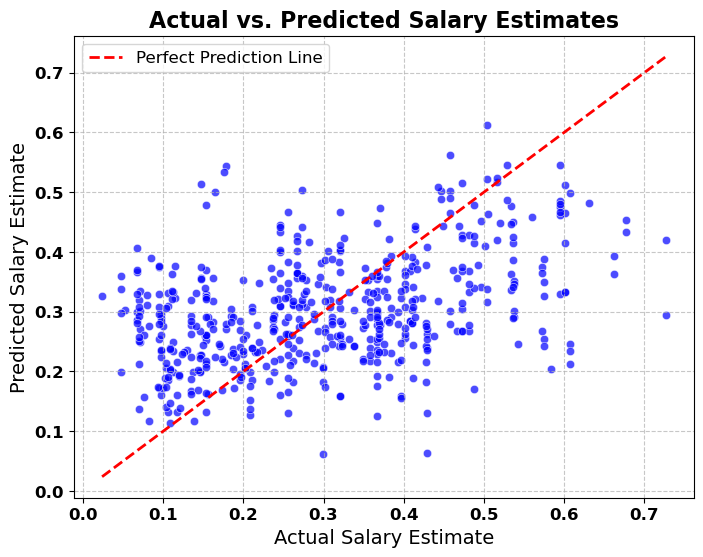

In [8]:
# regresion for prediction of salary


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



df=pd.read_csv("preprocessed_salary_data.csv")



# Split data into features (X) and target (y)
X = df.drop('Salary Estimate', axis=1)
y = df['Salary Estimate']



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "MLP": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

    # Print metrics
    print(f"Model: {name}")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    print("-" * 30)

# Results DataFrame
results_df = pd.DataFrame(results).T
print("\nPerformance Metrics:\n", results_df)

# Scatter plot for best-performing model (e.g., Random Forest)
best_model = models["Random Forest"]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2, label="Perfect Prediction Line")
plt.title("Actual vs. Predicted Salary Estimates", fontsize=16, fontweight='bold')
plt.xlabel("Actual Salary Estimate", fontsize=14)
plt.ylabel("Predicted Salary Estimate", fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()